##Proyecto Telco Grupo 4:
integrantes: Dario, Federico, Mauro, Qiyin

Importamos librerias y hacemos unas visualizaciones generales para ver como esta compuesto el dataset Churn.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('Churn.csv')

In [3]:
df.sample(5) #muestra 5rows aleatoreamente del dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6742,1960-UOTYM,Male,0,Yes,Yes,52,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,79.20,4016.3,No
2029,6481-OGDOO,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),90.60,6056.15,Yes
4624,0325-XBFAC,Male,0,No,No,8,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.70,740.3,Yes
3630,9986-BONCE,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5,Yes
3490,7743-EXURX,Male,0,Yes,Yes,8,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,51.05,415.05,Yes


In [4]:
df.info #muestra una breve informacion del dataset

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 r

In [5]:
df.columns #muestra columnas

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isna().sum() #no hay null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes #el tipo de objeto

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

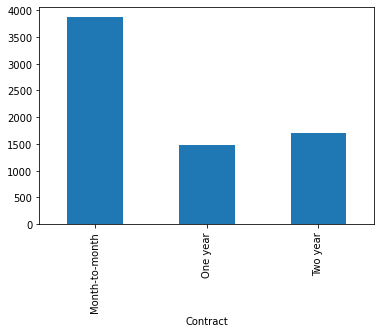

In [9]:
df.groupby(['Contract'])['Churn'].count().plot(kind='bar') #ver los churn en los tipos de contrato

#Un poco de Machine learning

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [0]:
X = df[['gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
            'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod','tenure','MonthlyCharges','TotalCharges']].copy()

X = pd.get_dummies(X,drop_first=True) #drop_first true elimina redundancia

y= df['Churn']

In [12]:
X.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,TotalCharges_1001.5,TotalCharges_1003.05,TotalCharges_1004.35,TotalCharges_1004.5,...,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
653,0,17,24.80,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3961,0,8,29.25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5948,0,70,84.60,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4719,0,36,84.90,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6342,0,47,104.10,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6559)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1) #para que siempre de el mismo entrenamiento

In [0]:
#Para que funcione bien algunos modelos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
%%time
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)
svc_cl = SVC(kernel = 'rbf', random_state = 1)
svc_cl.fit(X_train, y_train)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
logistic_reg = LogisticRegression(random_state = 1)
logistic_reg.fit(X_train, y_train)
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#el pibe no queria poner mas modelos jaja
print("LISTO")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LISTO
CPU times: user 6min 3s, sys: 466 ms, total: 6min 3s
Wall time: 5min 59s


In [22]:
%%time
kfold = model_selection.KFold(n_splits=10, random_state=1)
scoring = 'accuracy'

acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()
acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_adb.mean()
acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gbbost.mean()
acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dec1.mean()
acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gaussion1.mean()
acc_knn1 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn1.mean()
acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_random1.mean()
acc_log_reg1 = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_log_reg1.mean()
acc_sgd1 = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_sgd1.mean()
acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc1.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

0.7356997971602434

In [23]:
models_cross = pd.DataFrame({
    'Model': ['XG Boost','AdaBoost','GradientBoosting','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree', 'Guassian Naive Bayes', 'Kneighbours'],
    'Score': [acc_xgb.mean(),acc_adb.mean(),acc_gbbost.mean(),acc_svc1.mean(),acc_sgd1.mean(), acc_log_reg1.mean(), 
              acc_random1.mean(),acc_dec1.mean(), acc_gaussion1.mean(), acc_knn1.mean()]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score
0,XG Boost,0.799189
1,AdaBoost,0.797160
2,GradientBoosting,0.797160
6,Random Forest,0.771602
5,Logistic Regression,0.763286
4,Stochastic Gradient Decent,0.762475
7,Decision Tree,0.758215
3,Support Vector Machines,0.735700
9,Kneighbours,0.730223
8,Guassian Naive Bayes,0.278905
